## Imports

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import RootMeanSquaredError
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

1. Reading the data and visualisation

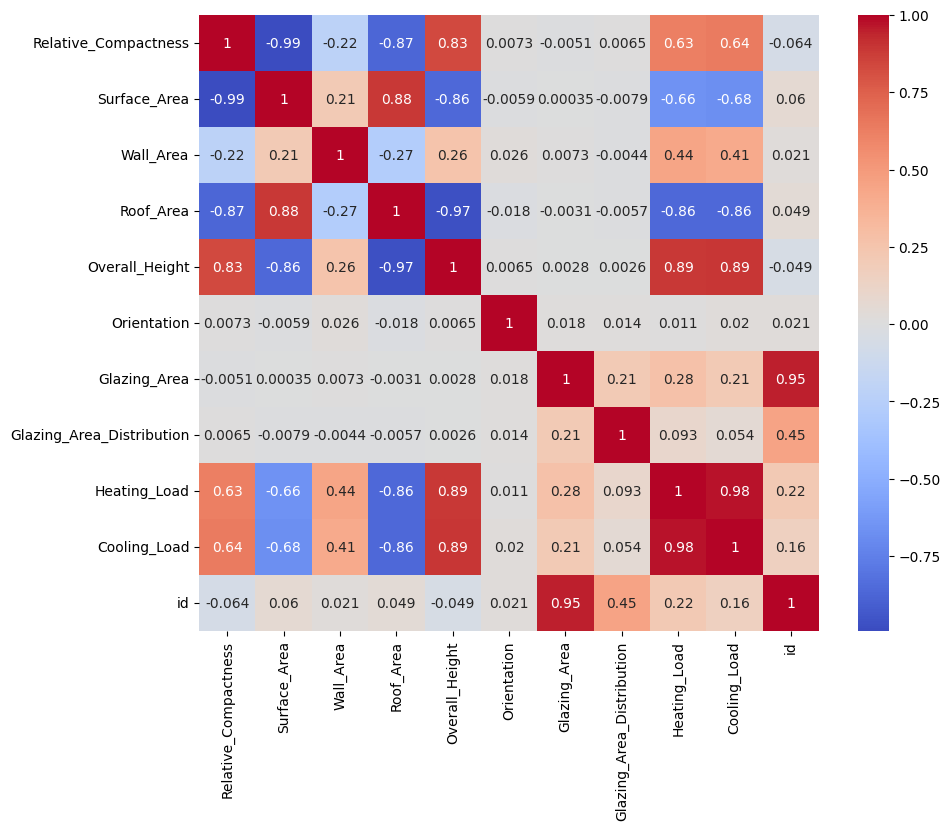

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       576 non-null    float64
 1   Surface_Area               576 non-null    float64
 2   Wall_Area                  576 non-null    float64
 3   Roof_Area                  576 non-null    float64
 4   Overall_Height             576 non-null    float64
 5   Orientation                576 non-null    int64  
 6   Glazing_Area               576 non-null    float64
 7   Glazing_Area_Distribution  576 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 36.1 KB


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,0.761875,673.664931,318.287326,177.688802,5.219618,3.515625,0.236545,2.829861
std,0.105511,88.199959,42.972513,44.839407,1.751257,1.106392,0.133600,1.549938
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [10]:
df = pd.read_csv('dataset.csv')
x_df = df.drop(columns=["id","Heating_Load","Cooling_Load" ])
y_df = df[["Heating_Load", "Cooling_Load"]]
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
x_df.info()
x_df.describe()

In [11]:
y_df.info()
y_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Heating_Load  576 non-null    float64
 1   Cooling_Load  576 non-null    float64
dtypes: float64(2)
memory usage: 9.1 KB


,Heating_Load,Cooling_Load
count,576.000000,576.000000
mean,22.101875,24.352257
std,10.027059,9.451193
min,6.010000,10.900000
25%,12.970000,15.585000
50%,18.175000,21.395000
75%,30.012500,32.830000
max,43.100000,48.030000


2. Preprocessing

In [12]:
scalerx = StandardScaler()
scalery = StandardScaler()
x_scaled = scalerx.fit_transform(x_df)
x_scaled = np.tile(x_scaled, (50, 1))
X = pd.DataFrame(x_scaled, columns=x_df.columns)
y_scaled = scalery.fit_transform(y_df)
y_scaled = np.tile(y_scaled, (50, 1))
Y = pd.DataFrame(y_scaled, columns=y_df.columns)


In [13]:
X.describe()



,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,2.880000e+04,2.880000e+04,2.880000e+04,2.880000e+04,2.880000e+04,2.880000e+04,2.880000e+04,2.880000e+04
mean,2.432005e-16,1.554312e-16,-5.747871e-16,-2.510338e-16,1.178687e-16,2.357682e-17,2.565849e-17,-7.253457e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.345821e+00,-1.806160e+00,-1.706929e+00,-1.505315e+00,-9.827870e-01,-1.371071e+00,-1.772080e+00,-1.827377e+00
25%,-9.663824e-01,-6.940830e-01,-5.656741e-01,-6.850108e-01,-9.827870e-01,-4.664470e-01,-1.022929e+00,-5.358812e-01
50%,-2.075054e-01,1.399750e-01,4.953363e-03,9.555971e-01,-9.827870e-01,-4.664470e-01,1.007972e-01,1.098669e-01
75%,5.513716e-01,9.740331e-01,5.755808e-01,9.555971e-01,1.017514e+00,1.342802e+00,1.224524e+00,7.556149e-01
max,2.069126e+00,1.530072e+00,2.287463e+00,9.555971e-01,1.017514e+00,1.342802e+00,1.224524e+00,1.401363e+00


In [14]:
Y.describe()

,Heating_Load,Cooling_Load
count,2.880000e+04,2.880000e+04
mean,2.812565e-17,-8.141636e-17
std,1.000017e+00,1.000017e+00
min,-1.606240e+00,-1.424577e+00
25%,-9.115148e-01,-9.284413e-01
50%,-3.919682e-01,-3.131697e-01
75%,7.896135e-01,8.977821e-01
max,2.095966e+00,2.507443e+00


3. Creating the model

In [15]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    # Dropout(0.2),
    # Dense(32, activation='relu'),
    Dense(256, activation='relu'),
    # Dropout(0.2),
    Dense(128, activation='relu'),
    # Dropout(0.2),
    Dense(2, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[RootMeanSquaredError(name='rmse')])

es = EarlyStopping(
    monitor='rmse',      # what metric to watch
    patience=20,             # how many epochs to wait before stopping
    restore_best_weights=True # go back to the best model
)
print("Training complete.")
print("Model Summary:")
model.summary()

Training complete.
Model Summary:


c:\Users\amaTek\Desktop\Machine Learning\soai\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,250 (395.51 KB)

 Trainable params: 101,250 (395.51 KB)

 Non-trainable params: 0 (0.00 B)

4. training the model

In [16]:
history = model.fit(X, Y, validation_split=0.2, epochs=500, batch_size=32, callbacks=[es])

Epoch 1/500
720/720 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0328 - rmse: 0.1812 - val_loss: 0.0036 - val_rmse: 0.0597
Epoch 2/500
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0029 - rmse: 0.0539 - val_loss: 0.0029 - val_rmse: 0.0541
Epoch 3/500
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0015 - rmse: 0.0389 - val_loss: 0.0011 - val_rmse: 0.0326
Epoch 4/500
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0011 - rmse: 0.0331 - val_loss: 4.6062e-04 - val_rmse: 0.0215
Epoch 5/500
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0016 - rmse: 0.0396 - val_loss: 0.0028 - val_rmse: 0.0533
Epoch 6/500
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.6887e-04 - rmse: 0.0259 - val_loss: 2.8631e-04 - val_rmse: 0.0169
Epoch 7/500
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0013 - rmse: 0.0367 - val_loss: 5.5545e-04 - val_rmse: 0.0236
Epoch 8/500
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.9883e-04 - rmse: 0.0223 - val_loss: 6.1723e-04 - val_rmse: 0.0248
Epoch 9/

5. Evaluation

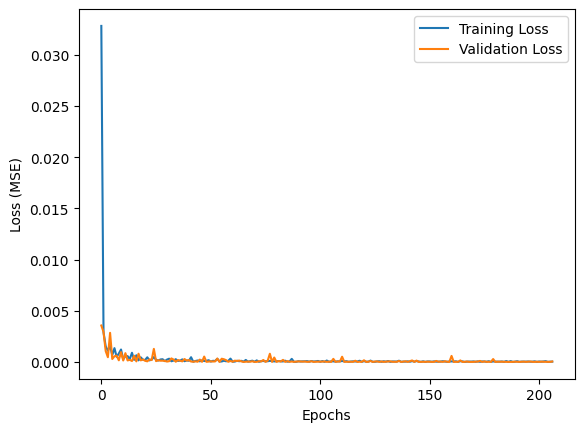

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

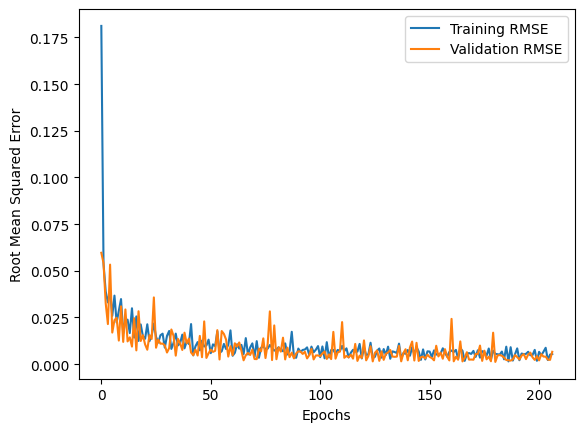

In [18]:
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

6. Read the evaluation set

In [19]:
df_eval = pd.read_csv('evaluation_set.csv')
df_eval["Overall_Height"]=df_eval["Overall_Height"] / 100
x_eval_df = df_eval.drop(columns=["id" ])
x_eval_df.info()
x_eval_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       192 non-null    float64
 1   Surface_Area               192 non-null    float64
 2   Wall_Area                  192 non-null    float64
 3   Roof_Area                  192 non-null    float64
 4   Overall_Height             192 non-null    float64
 5   Orientation                192 non-null    int64  
 6   Glazing_Area               192 non-null    float64
 7   Glazing_Area_Distribution  192 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 12.1 KB


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.771042,665.838542,319.138021,173.350260,5.341146,3.453125,0.227865,2.760417
std,0.106555,87.710838,45.641879,46.096984,1.752194,1.156765,0.132207,1.556912
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.690000,588.000000,294.000000,122.500000,3.500000,2.000000,0.100000,1.000000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


7. Preprocess the evaluation set

In [20]:
x_eval_scaled = scalerx.transform(x_eval_df)
X_eval = pd.DataFrame(x_eval_scaled, columns=x_eval_df.columns)
X_eval.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.086955,-0.088812,0.019813,-0.096841,0.069455,-0.056539,-0.065030,-0.044844
std,1.010773,0.995319,1.063041,1.028940,1.001405,1.046438,0.990429,1.005373
min,-1.345821,-1.806160,-1.706929,-1.505315,-0.982787,-1.371071,-1.772080,-1.827377
25%,-0.681804,-0.972102,-0.565674,-1.231880,-0.982787,-1.371071,-1.022929,-1.181629
50%,-0.017786,-0.138044,0.004953,-0.685011,1.017514,0.438177,0.100797,0.109867
75%,0.930810,0.696014,0.575581,0.955597,1.017514,0.438177,1.224524,0.755615
max,2.069126,1.530072,2.287463,0.955597,1.017514,1.342802,1.224524,1.401363


8. Predict

In [21]:
Y_eval_pred_scaled = model.predict(X_eval)
Y_eval_pred = scalery.inverse_transform(Y_eval_pred_scaled)
Y_eval_pred_df = pd.DataFrame(Y_eval_pred, columns=["Heating_Load", "Cooling_Load"])
Y_eval_pred_df.head()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


,Heating_Load,Cooling_Load
0,16.044668,17.106478
1,13.085696,16.317865
2,32.811291,32.689175
3,41.294025,45.870953
4,16.763988,20.125322


9. create the submission file

In [22]:
Y_eval_pred_df.insert(0, 'id', df_eval['id'])
Y_eval_pred_df.to_csv('evaluation_predictions.csv', index=False)